## Exploratory Data Analysis

In this project we are going to be working with the **Wine** dataset. This is a 178 sample dataset that categorises 3 different types of Italian wine using 13 different features. The code below loads the Wine dataset and selects a subset of features for you to work with. 

In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

import matplotlib

# load data
wine=datasets.load_wine()
#print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X = df_wine[selected_features].values
## df_wine[selected_features].to_numpy()
y = wine.target

### Visualising the data

In [2]:
def myplotGrid(X,y):    
    """
    Plot pairwise relationships in a dataset `X` and to map its target variable `y` plot aspect in different colors.
    
    This function will create a grid of Axes such that each numeric variable in data will be applied across the y-axes 
    across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate 
    distribution plot is drawn to show the marginal distribution of the data in each column. 
    
    Parameters
    ----------
    X : numpy.ndarray
        Feature variables where each column is a feature and each row is an observation
    y : numpy.ndarray, 1-d array
        Target variable to map plot aspects to different colors 
        
   Returns
   -------
   grid plots : axes.SubplotBase
       Returns the axes of subplots. 
   
   See Also
   --------
   matplotlib.pyplot.subplot2grid.
   """   
    # list the unique labels in target variable
    labels=np.unique(y)
    # define a color platte to map with different labels
    colors=matplotlib.colors.TABLEAU_COLORS.values()
    # define figure size
    fig = plt.figure(figsize=(20,20))
    
    # map subplot grid row-wise features
    for i,j in enumerate(selected_features):
        # map grid subplot column wise features
        for ii,k in enumerate(selected_features):
            # plot diagonal axes with univariate marginal distribution
            if i == ii: 
                # define subplot position
                plt.subplot2grid((4,4), (i,ii))
                # plot subgroup data as per unique labels
                for a, b in zip(labels,colors):
                    pd.Series(X[y==a,i]).plot(kind='kde', label=a, color=b)
                               
            # plot other axies with pair-wise features scatter plot
            if i != ii:
                # define subplot position
                plt.subplot2grid((4,4), (i,ii))
                # use try block to print out errors if color platte is less than target categories
                try:
                    if len(labels)<len(colors): 
                        # map color to labels in target variable
                        for a, b in zip(labels,colors): 
                            plt.scatter(X[y==a,ii], X[y==a,i], label=a,c=b)   
                except:
                    print(f"Error. Maximum number of colors is {len(colors)}")
            # define labels for x, y axis in each subplot
            plt.xlabel(k)
            plt.ylabel(j)
            plt.legend(loc="upper right")  

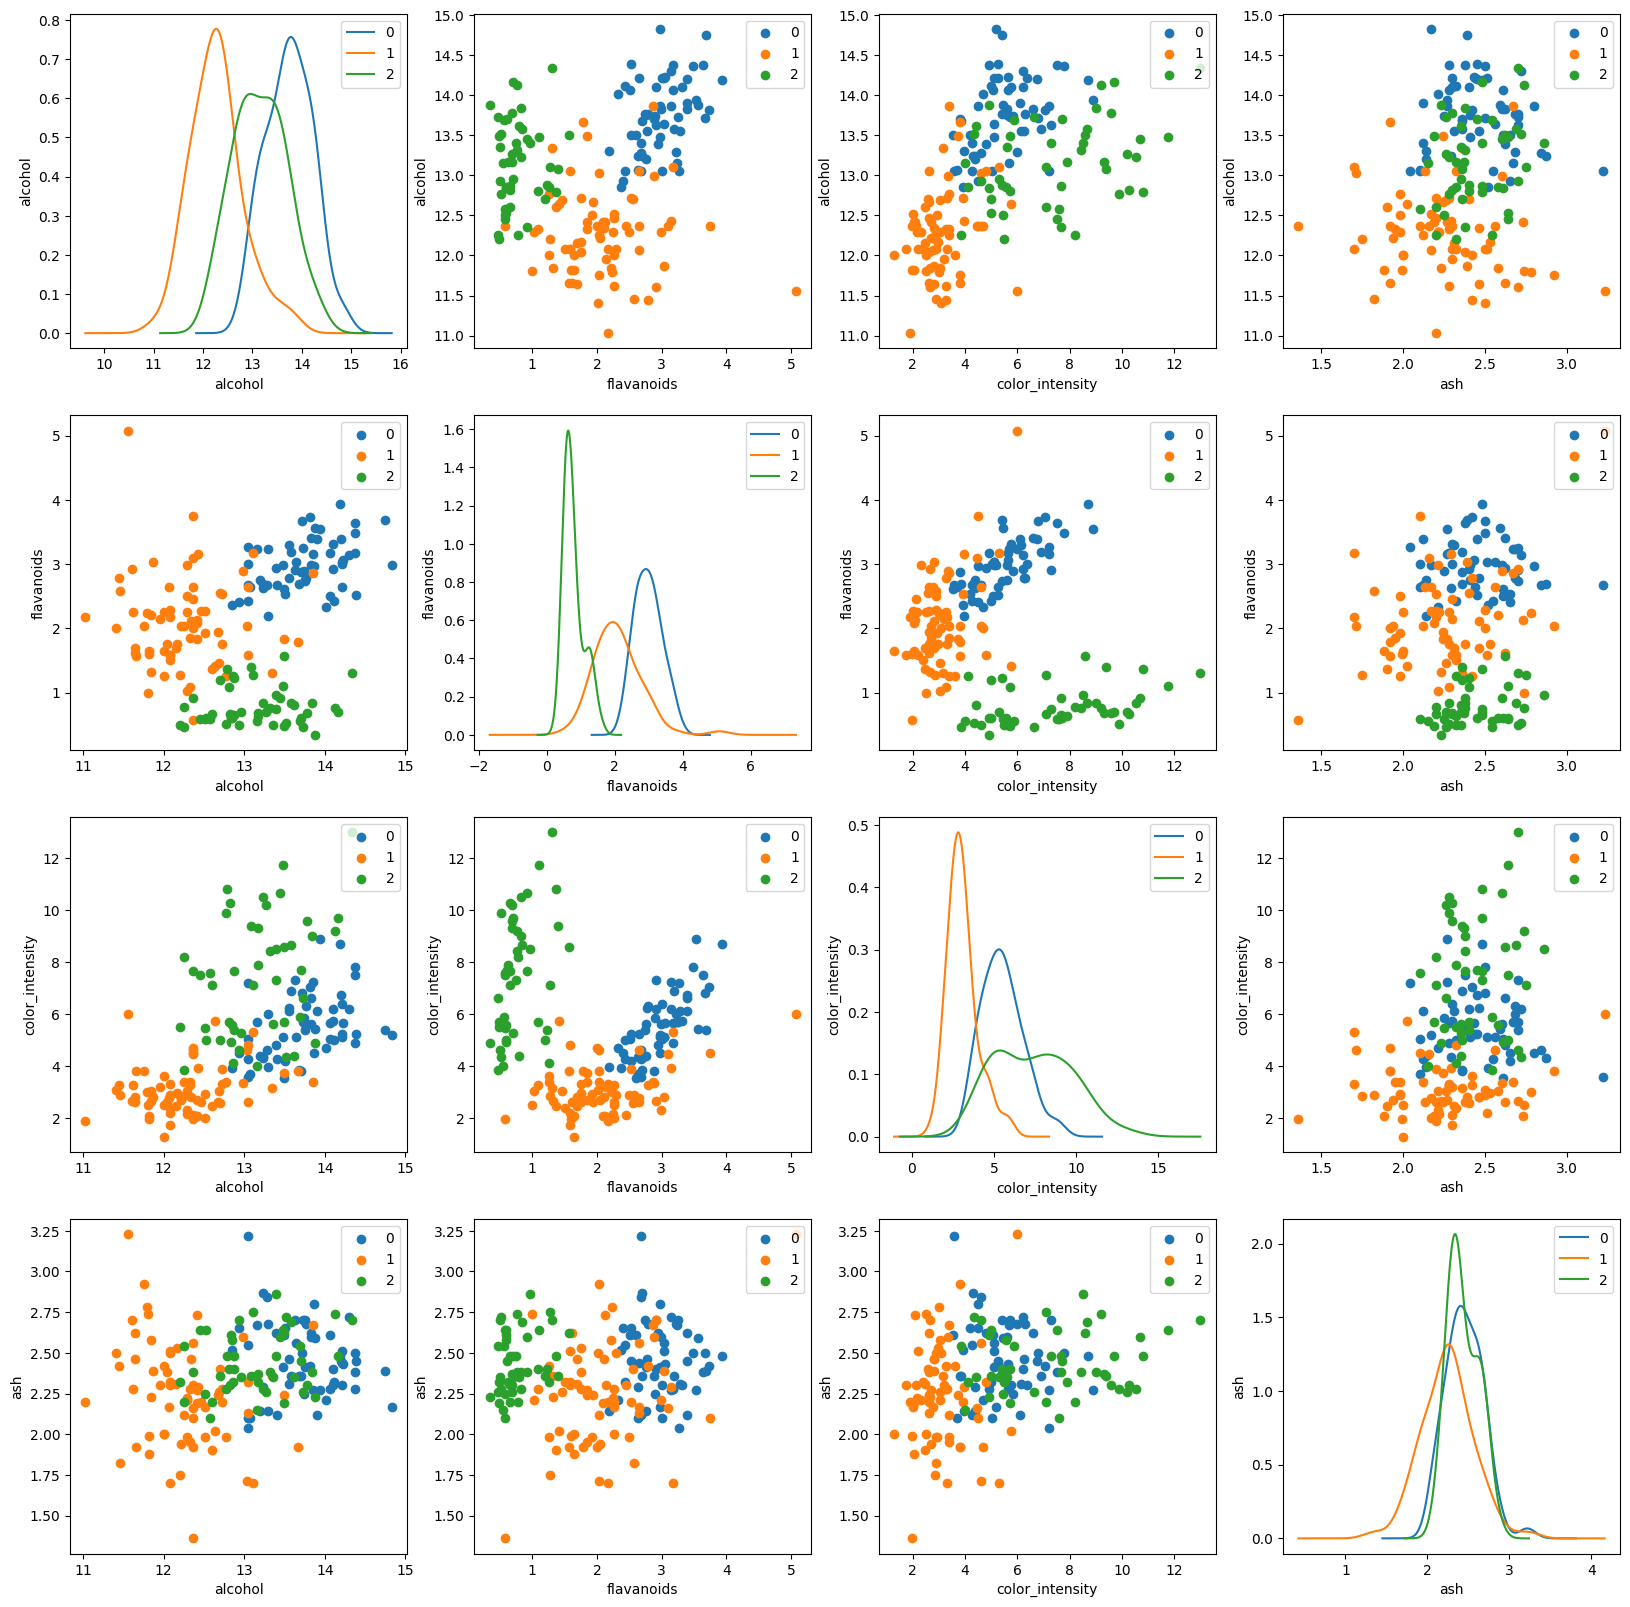

In [3]:
myplotGrid(X,y)

### Exploratory Data Analysis under noise

When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. we try to perturb the data with some Gaussian noise to mimic the real situation.

In [4]:
# To generate random noise and add to predictors

#Noise code
np.random.seed(12345) 
XN=X+np.random.normal(0,0.5,X.shape)

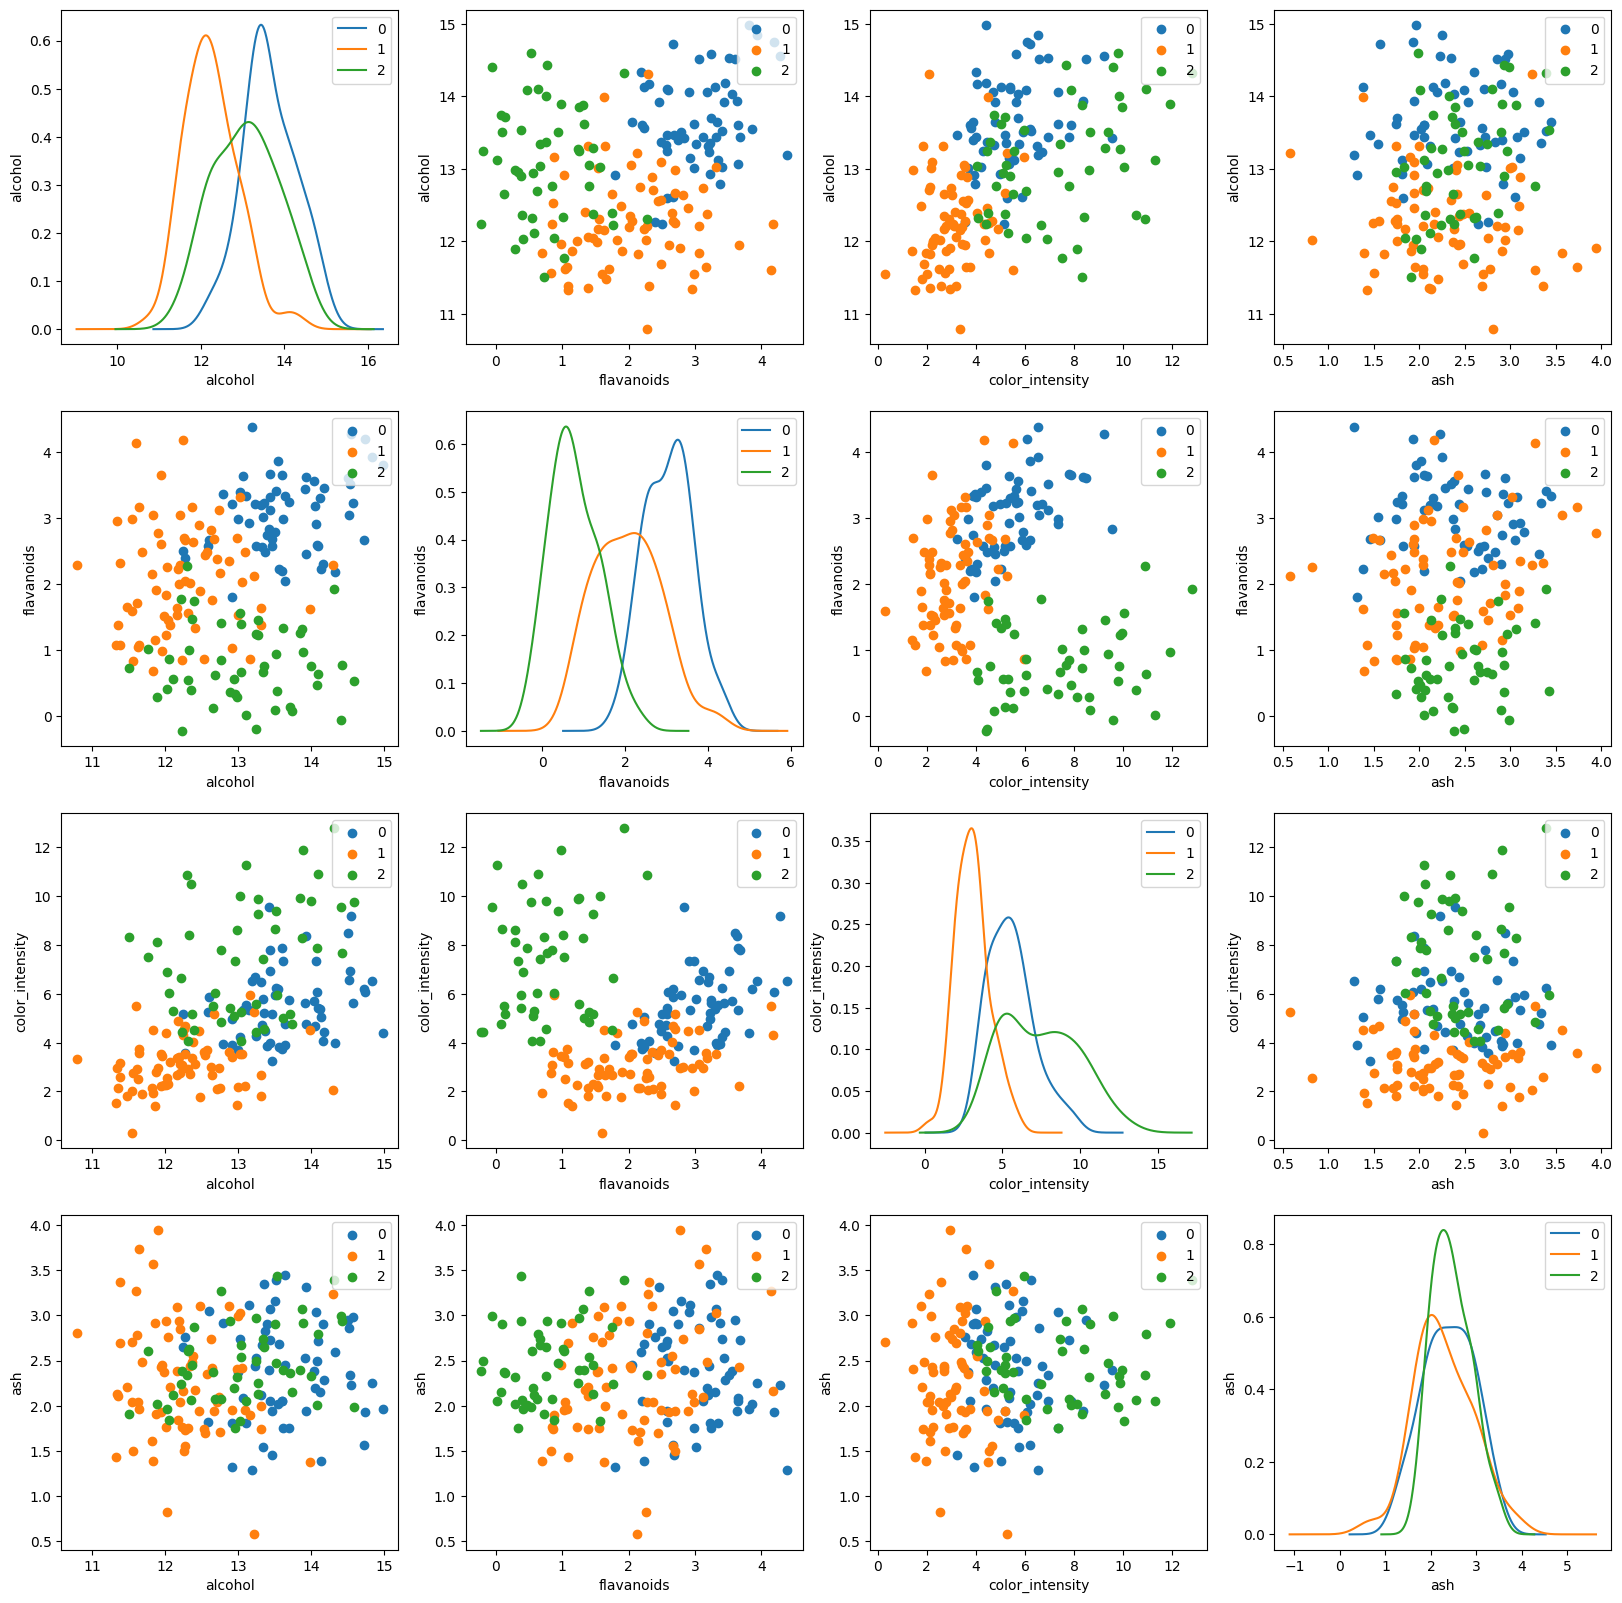

In [5]:
myplotGrid(XN,y)

**1. How to choose only two features to buid a classifier using K-nearest neighbour?**

A classifier in machine learning is an algorithm that categorizes our data into different classes which refer to the classes of ('class_0', 'class_1', 'class_2') in our wine data set. k-nearest neighbour algorithm classifies target data points by measuring its distance from the existing labelled neighbour data points. A better classifier usually make less errors..

Different classes of wines may have the similar or different values among different features. When a feature varies more among wine classes tend to be able to better classify different wines.

In the myplotGrid(X,y) figure, the diagonal plots are univariate histograms, where we can visualise information such as the mean, standard diviation and range. Specifically, features acohol and flavanoids histograms showed differentiable mean values for different wine classes which may imply better classification as different wines probably will cluster at very different positions along these features. Moreover, flavanoids histogram showed wine class 0 and wine class 2 have very different range, with little intersect, which implies better seperation with litter error. However, wine class 1 intersect with the other two classes heavily. Hence, single feature, flavanoids, alone could not be able to seperate out class 1. Although all feature histograms showed intersections between class 1 and the other two classes, by comparison, feature color_intensity showed the smallest standard deviation and its mean value is away from others as well. Only few data points fell on the right long tail intersect with other wine classes. In comparason to other features, color_intensity could better separate class 1.

Hence, flavanoids and color density could be used to build machine learning model in this case.

This could be further confirmed by feature pairs scatter plots. From pair plot visualization, the pairs of features (alcohol, color_intensity), (alcohol, ash), (flavanoids, ash), (color_intensity, ash) are more identical among different wine classes comparing to (alcohol, flavanoids) and (flavanoids, color_intensity).

Feature pairs (alcohol, flavanoids) and (flavanoids, color_intensity) both can separate class_0 and class_2. However, it is difficult to justify which feature pairs better seperate class_1 wine. From diagonal histogram, we can see color intensity is more peaked and only have few data points on the right skewed long tail which intersect into other classes. Hence, (flavanoids, color_intensity) feature pairs could provide less errors in classification comparing to other feature pairs

**2. What is the impact of Gaussian noise?**

After added Gaussian noise, the feature univariate histograms seemed more like bell curve, which indicates normal distribution. data points are more blended and intersections between different wine classes increased among all features. However, we still can visualize that flavanoids have minimun intersect between wine class 0 and 2, comparing to other features. While color_intensity showed least data points from class 1 which blended with other two classes. Among all the features, ash showed highly similar mean, range and standard deviation between different wine classes. Plots of feature pairs also become more blended. 

Apparently, noise added may increase our errors in classifying. On the other hand, noise may allow machine learning models to better learn the general rules in our data. Hence, model could have more resilience on unseen data sets.


## Implementing kNN (hard coding approach)


In [6]:
# helper code
def EucliDist(p,q):
    """
    Compute the distance between two observations in n-dimentional space.
    
    Parameters
    ----------
     p, q : 1-d array
        Input vectors in n-dimensional space.
            
    Returns
    -------
    distance : float
        Returns the scalar value of the L2 norm distance between two observations.
        
    See also
    --------
    numpy.array
        Returns a numpy array object.
    """
    # compute the distance between two observations along axises
    ax = np.array(p)-np.array(q)
    # compute the L2 norm distance between two observations
    return np.sqrt(np.dot(ax,ax))  

def ManhtDist(p,q):
    """
    Compute the distance between two observations in n-dimentional space.
    
    Parameters
    ----------
    p, q : 1-d array
        Input vectors in n-dimensional space.
    
    Returns
    -------
    distance : float
        Returns the scalar value of the L1 norm distance between two observations.    
    """
    # compute the L1 norm distance between two observations
    mht = sum([abs(i-j) for i,j in zip(p,q)]) 
    return mht

def MaxVotes(data):
    """
    Compute the most common value in the passed data.
    
    If there is more than one of such value, the first value will be passed
    
    Parameters
    ----------
    data : array or array-like
        1-dimensional array or list of which to find the mode
    
    Returns
    -------
    mode : object
        The modal value of input data.  
 
    See also
    --------
    numpy.unique   
        Find the unique elements of an array.
    """
    # create unique labels and the frequency counts of related label arrays
    label, counts = np.unique(data, return_counts=True)
    # return the label with maximun frequency counts
    return label[np.argwhere(counts == np.max(counts))[0][0]] 

In [7]:
def myTrainTestSplit(X,y, trainSize,mySeed=0):
    """
    Split arrays into random train and test subsets.
    
    Parameters
    ----------
    X : n-dimensional array
        Input variables to be splitted into training and testing subsets.
    y : 1-dimensional array
        Output variable to be splited into training and test subsets.
    trainSize: float
        Ranged from 0.0 to 1.0 representing the proportion of data to be included
        in the training subsets.
    seed: int
        Controls the shuffling applied to the data before applying the split.
        The int will be passed to random_state for reproducible output across 
        multiple function calls.
            
    Returns
    -------
    splitting : list of arrays
        List contains train-test split of inputs and outputs.
    """
    
    # permute row indices of X 
    indices = np.random.RandomState(seed=mySeed).permutation(X.shape[0])
    
    # calculate point(or length) to slice on indices
    slicePoint=round(trainSize*len(X))
    
    # slice out train and test set indices
    indices_train=indices[:slicePoint]
    indices_test=indices[slicePoint:]
    
    # extract train and test datasets by indices_train and indices_test
    X_train=X[indices_train]
    X_test=X[indices_test]
    y_train=y[indices_train]
    y_test=y[indices_test]
    
    # return train, test datasets
    return [X_train, y_train, X_test, y_test]

In [8]:
# apply TrainTestSplit function to split predictors and outcome variables.
X_train,y_train,X_test,y_test = myTrainTestSplit(X,y,0.85,1234)   
print(len(X_train),len(X_test))

151 27


In [9]:
# comparing with sklearn train_test_split for myTrainTestSplit correctness checking
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15, random_state=1234)
print(len(X_train), len(X_test))

151 27


In [10]:
# mykNN code
def myKNN(X_train,y_train,X_test,DistanceFunction=EucliDist,k=1):
    """
    Predict the class labels for the provided data.
    
    Parameters
    ----------
    X_train : n-dimensional array
        Training data
    X_test : n-dimensional array
        Query data point or data points
    y_train : 1-dimensional array
        Target values
    DistanceFunction : function callable
        The distance metric function to calculate distance
        between two data points.
        Default euclidean distance (L2 norm)
    k : int
        Number of neighbors to use.
    
    Returns
    -------
    class labels for each queried data point as a list.    
    """
    y_=[]
    for i in range(len(X_test)):
        distance=[]
        k_labels=[]
        for j in range(len(X_train)):
            # calculate distance from i to j data point
            Cal_distance = DistanceFunction(X_test[i], X_train[j])  
            # collect the distance from i to j(training data points).
            distance.append((Cal_distance, j))  
        # sort values by accending order of calculated distances.
        distance.sort(key=lambda distance: distance[0]) 
        # select k nearest neighbors
        for dist, j in distance[0:k]:
            k_labels.append(y_train[j])
        # predict data point i's label
        i_label = MaxVotes(k_labels)
        #collect i's label in prediction list
        y_.append(i_label)
    return y_   

In [11]:
# predict test dataset with Euclidean distance and k=5
y_=myKNN(X_train, y_train, X_test, EucliDist, 5)

In [12]:
# print out predicted labels
print(y_)

[1, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 2, 0]


In [13]:
# use sklearn model to evaluate myKNN model correctness.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_sklearn=knn.predict(X_test)

# compare prediction results from sklearn model and myKNN model
y_==y_sklearn

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

## Classifier evaluation

In [14]:
# evaluate confusion matrix, accuracy and the per label percision and recall.
def myMetrics(y_true, y_pred):
    """
    Computes confusion matrix, the prediction accuracy and 
    per label precision and recall.
    
    In multilabel classification, the set of labels from y_true
    and y_pred must match exactly.
    
    Parameters
    ----------
    y_true : 1-dimensional array or array like
        True labels
    y_pred : 1-dimensional array or array like
        Predicted labels
        
    Returns:
    --------
    Accuracy score : float
        The float number of correct predictions over total predictions.
    precision and recall scores : pandas.DataFrame object
        The data frame recording per label precision and recall scores as float
    confusion matrix : pandas.DataFrame object
        The data frame with true labels as row labels and predicted
        labels as columns names.    
    """
    
    # construct list of unique class labels from test dataset
    classes = np.unique(y_true)
    
    #construct confusion matrix as pandas dataframe to increase readability 
    #using true, prediction labels as row, column labels
    cm = pd.DataFrame(np.zeros((len(classes),len(classes))), index=classes, columns=classes)
    cm.index.name="TrueLabel"
    cm.columns.name="Prediction"
    for label, pred in zip(y_true, y_pred):
        cm.loc[label,pred] +=1
    
    # calculate per-label precision and recall scores
    # calculate accuracy scores
    precisions=[]
    recalls=[]
    TotalTP=0
    for i in np.unique(y_true):
        # calculate correct predictions of label i
        TP = cm.loc[i,i] 
        # calculate false positives
        FP = cm.loc[:,i].sum()-TP
        # calculate false negatives
        FN = cm.loc[i,:].sum()-TP
        # add up correct predictions to TotalTP
        TotalTP +=TP
        #calculate precision score of label i
        precision=TP/(TP+FP)
        #calculate recall score of label i
        recall=TP/(TP+FN) 
        # append label i's precision/recall to lists
        precisions.append(precision)
        recalls.append(recall)
        
    #calculate overall accuracy score
    Accuracy=TotalTP/cm.values.sum()
    
    #construct overall per label precision, recall to pandas dataframe for readability 
    preci_recall=pd.DataFrame([precisions,recalls], index=['precision','recall'], columns=np.unique(y_true)).T
   
    # pull out all metrics
    return Accuracy, preci_recall, cm

In [15]:
Accuracy, preci_recall, confusionMatrix=myMetrics(y_test, y_)

In [16]:
Accuracy

0.9629629629629629

In [17]:
preci_recall

,precision,recall
0,1.0,1.000000
1,1.0,0.909091
2,0.9,1.000000


In [18]:
confusionMatrix

Prediction,0,1,2
TrueLabel,,,
0,7.0,0.0,0.0
1,0.0,10.0,1.0
2,0.0,0.0,9.0


In [19]:
# import sklearn metrics to test myMetrics function correctness
from sklearn import metrics
sk_cm = metrics.confusion_matrix(y_test, y_)
print(sk_cm)
print(metrics.precision_score(y_test, y_,average=None,labels=np.unique(y_test)))
print(metrics.recall_score(y_test, y_,average=None,labels=np.unique(y_test)))
print(metrics.accuracy_score(y_test, y_))

[[ 7  0  0]
 [ 0 10  1]
 [ 0  0  9]]
[1.  1.  0.9]
[1.         0.90909091 1.        ]
0.9629629629629629



## 5-fold Nested Cross-validation with myKNN 

In [20]:
# myNestedCrossVal code

def myNestedCrossVal(X,y,nFolds,dist_param,k_param,mySeed=0):
    """
    Evaluate given parameters to build optimum models, 
    evaluate metrics for optimun models.
    
    Parameters
    ----------
    X, y : n-dimensional array
        The data which nested cross validation run on.    
    nFolds : int
        Number of folds splited for cross validation.
    dis_param : list of functions
        Objects calculating distance between two data points.
    k_param : list of int
        Parameters defining number of neighbors used in classification.
    mySeed : int
        Seed the generator when `RandomState` is initialized for reproductive results.
        
    Returns
    -------
    testFoldAccuracy : dictionary
        Accuracy score as dictionary value while tuple storing the fold index, 
        optimun distance function and k value as key for the test fold.  
    valMetricsmodel metrics, testFoldMetrics : dictionaries
        Metrics dictionary where dictionary values as pandas dataframe object
        storing per fold confusion matrix, precison and recall(per label), 
        while keys storing the fold index, distance function, k value and
        accuracy score in a tuple.
             
    See Also
    --------
    numpy.random.RandomState
    EucliDist.
    ManhtDist. 
    myKNN.
    """
    
    indices = np.random.RandomState(seed=mySeed).permutation(np.arange(0,len(X),1))
    indices = np.array_split(indices, nFolds)
    testFoldAccuracy={}
    testFoldMetrics={}
    
    valFoldAccuracy={}
    valMetrics={}
    
    for iFold in range(0,nFolds):
        testFold = indices[iFold]  ## e.g. testFold = 1, remaining = [0,2,3,4], val=0, train=[2,3,4]
        print('new iterration')

        remainingFolds = np.delete(range(0,nFolds), iFold)
        #print(remainingFolds)
        validationFold = indices[remainingFolds[0] ] ##use the 1st remaining fold to validate
        #print(validationFold)
        
        #print(remainingFolds[1:])
        outerTrainFolds=[]  #
        for i in remainingFolds:
            outerTrainFolds.extend(indices[i])

        innerTrainFold = []
        for i in remainingFolds[1:]:
            innerTrainFold.extend(indices[i])
            
        #Create inner loop classifying models with different k values and 
        #distance functions to evaluate model accuracies
        for d in dist_param:
            for k in k_param:
                # predict labels for validation fold with distance function d and k nearest neighbor
                y_valPred=myKNN(X[innerTrainFold], y[innerTrainFold], X[validationFold], d, k)
                #calculate validation set metrics, including confusion matrix,
                #accuracy and per label precision, recall
                Accuracy, preci_recall, confusionMatrix=myMetrics(y[validationFold], y_valPred) 
                # print out validation fold accuracy scores for iFold test fold
                print("Validation Fold: %s" %remainingFolds[0], "Distance Function: %s"
                      %d.__name__, "k: %s" %k, "Accuracy: %s" %Accuracy)

                # record accuracies in validation fold as per each model built
                valFoldAccuracy[(iFold,d,k)]=Accuracy
                # record validation fold metrics as per each model built
                cm_preci_recall=pd.concat([confusionMatrix,preci_recall],axis=1) 
                valMetrics[(iFold, d.__name__,k, Accuracy)]=cm_preci_recall
                    
        # evaluate the optimun validation fold parameters 
        # which is the model generating the highest accuracy score
        valParams=list(valFoldAccuracy.keys())
        valAccuracy=list(valFoldAccuracy.values())
        #pull out the parameters with highest accuracy
        fold,dOpt, kOpt = valParams[np.argmax(valAccuracy)]
        
        #print out best set of parameters for iFold after validation
        print("Optimum distance function: %s  "  % dOpt, "Optimum k: %s  "  % kOpt)
        
        #predict iFold labels with best set parameters from validation
        y_=myKNN(X[outerTrainFolds],y[outerTrainFolds],X[testFold], dOpt, kOpt)
        
        # calculate metrics for test fold (iFold)
        t_Accuracy, t_preci_recall, t_confusionMatrix=myMetrics(y[testFold], y_)
        t_cm_preci_recall=pd.concat([t_confusionMatrix,t_preci_recall],axis=1)
        testFoldMetrics[(iFold, dOpt.__name__, kOpt,t_Accuracy)]=t_cm_preci_recall
        testFoldAccuracy[(iFold, dOpt.__name__, kOpt)]=t_Accuracy   
        
        # print out test fold confusion matrix
        print("Test Fold Confusion Matrix %s " % t_confusionMatrix)
    # return test fold accuracy scores, test fold metrics and validation folds metrics    
    return testFoldAccuracy,  testFoldMetrics, valMetrics

In [21]:
# cross validation on clean data 
testFoldAccuracy_X,  testFoldMetrics_X, valMetrics_X = myNestedCrossVal(X,y,5,[EucliDist,ManhtDist],list(range(1,11)))

new iterration
Validation Fold: 1 Distance Function: EucliDist k: 1 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: EucliDist k: 2 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 3 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 4 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 5 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 6 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: EucliDist k: 7 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: EucliDist k: 8 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: EucliDist k: 9 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: EucliDist k: 10 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: ManhtDist k: 1 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: ManhtDist k: 2 Accuracy: 0.9166666666666666


In [22]:
# cross validation on noisy  data code
testFoldAccuracy_XN,  testFoldMetrics_XN, valMetrics_XN=myNestedCrossVal(XN,y,5,[EucliDist,ManhtDist],list(range(1,11)))

new iterration
Validation Fold: 1 Distance Function: EucliDist k: 1 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 2 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: EucliDist k: 3 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 4 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 5 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 6 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 7 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 8 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 9 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 10 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: ManhtDist k: 1 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: ManhtDist k: 2 Accuracy: 0.8888888888888888


## Summary of results

In [23]:
# summary of results for clean data
summary_X=pd.DataFrame(testFoldAccuracy_X.keys(),
                           columns=['FoldLabel', 'distance','k'])

summary_X['accuracy']=testFoldAccuracy_X.values()
summary_X

,FoldLabel,distance,k,accuracy
0,0,EucliDist,2,0.888889
1,1,EucliDist,2,0.972222
2,2,EucliDist,2,0.944444
3,3,EucliDist,2,0.885714
4,4,EucliDist,2,0.942857


In [24]:
print("Clean data average accuracy: %s" % (np.mean(summary_X['accuracy'])), "+/-", str(np.std(summary_X['accuracy'])))

Clean data average accuracy: 0.9268253968253968 +/- 0.03393411724841352


In [25]:
# summary of results for noisy data
summary_XN=pd.DataFrame(testFoldAccuracy_XN.keys(),
                           columns=['FoldLabel', 'distance','k'])

summary_XN['accuracy']=testFoldAccuracy_XN.values()
summary_XN

,FoldLabel,distance,k,accuracy
0,0,EucliDist,4,0.777778
1,1,EucliDist,4,0.944444
2,2,EucliDist,4,0.888889
3,3,EucliDist,4,0.942857
4,4,EucliDist,4,0.914286


In [26]:
print("Noise data average accuracy: %s" % (np.mean(summary_XN['accuracy'])), "+/-", str(np.std(summary_XN['accuracy'])))

Noise data average accuracy: 0.8936507936507937 +/- 0.06144313022176463


### Confusion matrix summarize the overall results on both the clean data and noise data.


In [27]:
# Clean data validation folds summary report

val_fold_X=pd.concat(valMetrics_X.values(), axis=0, 
                           keys=valMetrics_X.keys(),
                           names=['kFoldLabel', 'distance','k','accuracy','trueLabel'])

# Clean data test folds summary report
test_fold_X=pd.concat(testFoldMetrics_X.values(), axis=0, 
                            keys=testFoldMetrics_X.keys(),
                            names=['kFoldLabel', 'distance','k','accuracy','trueLabel'])

# overall clean data summary report
summary_X=pd.concat([test_fold_X, val_fold_X], 
                    keys=['testFolds', 'valFolds'], axis=0)

In [28]:
# Noisy data validation folds summary report

val_fold_XN=pd.concat(valMetrics_XN.values(), axis=0, 
                           keys=valMetrics_XN.keys(),
                           names=['kFoldLabel', 'distance','k','accuracy','trueLabel'])

# Noisy data test folds summary report
test_fold_XN=pd.concat(testFoldMetrics_XN.values(), axis=0, 
                            keys=testFoldMetrics_XN.keys(),
                            names=['kFoldLabel', 'distance','k','accuracy','trueLabel'])

# overall noisy data summary report
summary_XN=pd.concat([test_fold_XN, val_fold_XN], 
                    keys=['testFolds', 'valFolds'], axis=0)

In [29]:
# clean data summary report
summary_X

0     1    2   
          kFoldLabel distance  k  accuracy trueLabel                    
testFolds 0          EucliDist 2  0.888889 0          14.0   0.0  0.0  \
                                           1           3.0  12.0  1.0   
                                           2           0.0   0.0  6.0   
          1          EucliDist 2  0.972222 0           8.0   0.0  0.0   
                                           1           1.0  14.0  0.0   
...                                                    ...   ...  ...   
valFolds  4          ManhtDist 9  0.833333 1           5.0  10.0  1.0   
                                           2           0.0   0.0  6.0   
                               10 0.833333 0          14.0   0.0  0.0   
                                           1           5.0  10.0  1.0   
                                           2           0.0   0.0  6.0   

                                                      precision    recall  
          kFoldLabel distance  k  accuracy trueLabel                       
testFolds 0          EucliDist 2  0.888889 0           0.823529  1.000000  
                                           1           1.000000  0.750000  
                                           2           0.857143  1.000000  
          1          EucliDist 2  0.972222 0           0.888889  1.000000  
                                           1           1.000000  0.933333  
...                                                         ...       ...  
valFolds  4          ManhtDist 9  0.833333 1           1.000000  0.625000  
                                           2           0.857143  1.000000  
                               10 0.833333 0           0.736842  1.000000  
                                           1           1.000000  0.625000  
                                           2           0.857143  1.000000  

[315 rows x 5 columns]

In [30]:
# noisy data summary report
summary_XN

0     1    2   
          kFoldLabel distance  k  accuracy trueLabel                    
testFolds 0          EucliDist 4  0.777778 0          12.0   1.0  1.0  \
                                           1           5.0  10.0  1.0   
                                           2           0.0   0.0  6.0   
          1          EucliDist 4  0.944444 0           7.0   1.0  0.0   
                                           1           1.0  14.0  0.0   
...                                                    ...   ...  ...   
valFolds  4          ManhtDist 9  0.861111 1           4.0  11.0  1.0   
                                           2           0.0   0.0  6.0   
                               10 0.861111 0          14.0   0.0  0.0   
                                           1           4.0  11.0  1.0   
                                           2           0.0   0.0  6.0   

                                                      precision    recall  
          kFoldLabel distance  k  accuracy trueLabel                       
testFolds 0          EucliDist 4  0.777778 0           0.705882  0.857143  
                                           1           0.909091  0.625000  
                                           2           0.750000  1.000000  
          1          EucliDist 4  0.944444 0           0.875000  0.875000  
                                           1           0.933333  0.933333  
...                                                         ...       ...  
valFolds  4          ManhtDist 9  0.861111 1           1.000000  0.687500  
                                           2           0.857143  1.000000  
                               10 0.861111 0           0.777778  1.000000  
                                           1           1.000000  0.687500  
                                           2           0.857143  1.000000  

[315 rows x 5 columns]

In [31]:
#compare prediction results with sklearn KNeighborsClassifier 
#on test data set based on optimun parameters.

# replicate 5 folds splitting in myNestedCrossVal function
nFolds=5
for iFold in range(0,nFolds):
    np.random.seed(0)
    indices = np.random.permutation(np.arange(0,len(X),1))
    indices = np.array_split(indices, nFolds)
    testFoldAccuracy={}
    testFoldMetrics={}
    
    valFoldAccuracy={}
    valMetrics={}
    
    
    testFold = indices[iFold]

    remainingFolds = np.delete(range(0,nFolds), iFold)
        #print(remainingFolds)
    validationFold = indices[remainingFolds[0] ]
        #print(validationFold)
        
        #print(remainingFolds[1:])
    outerTrainFolds=[]
    for i in remainingFolds:
        outerTrainFolds.extend(indices[i])

    innerTrainFold = []
    for i in remainingFolds[1:]:
        innerTrainFold.extend(indices[i])
    
    # model with sklearn KNeighborsClassifier
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=2, p=2 )
    knn_model=knn.fit(X[outerTrainFolds], y[outerTrainFolds] )
    
    #predict based on myKNN model and sklearn model
    A=knn_model.predict(X[testFold])
    B=myKNN(X[outerTrainFolds],y[outerTrainFolds],X[testFold], EucliDist, 2)
    
    #compare prediction from myKNN model and sklearn model on each test fold
    print(A==B)  

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  Tru

**Influence of noise: does noise change the best parameters?**

In our case, it seemed that Euclidean distance measure outperformed Manhattan distance measure regardless noise added in the data or not. While the k value increased when noise was added. However, this is not a rule. 

Feature selection matters: refer to below image row 1~3, which presents summary reports based on modelling with different features. The optimun distance function and k values varied when features varied. Referred back to grid plots above, it is possible that row3(color_density & flavanoids) features could sufficiently seperate the three wine classes. The modelling summary report with row3(color_density & flavanoids) showed higher accuracy scores comparing modelling with other features. Moreover, increasing features didn't present better performance in both clean data and noisy data.

The scales of features matters: comparing the summary reports based unscaled feature and scaled features( 1 vs 4, 2 vs 5, 3 vs 6), after scaling, the optimun distance measure, k value and accuracy changed in both clean data and noisy data. The optimun parameters may change or not change when noise added in predictors. 

Noise Level matters: if noise level is too small, there would be little impact on predicting. However, if noise level is too high(i.e. same as data range), noises would fill up spaces among data points diluting any pattern exists, making our classification difficult, regardless k values or distance measures.

The best parameter is also related to metric selected. In above modelling, accuracy scores were selected to measure performance and determine best parameters. However, depending customer's needs, other metrics could be used to evaluate best parameters. Therefore, different patterns could be presented when noise is added to predictors.

The above modelling showed Euclidean distance measure as optimun parameter across all test folds regardless noise added or not. One possible reason could because feature color_intensity has a larger scale comparing to other features. Referring back to grid plots, color_intensity could better seperate wine class 1 than other features. Additionally, Euclidean distance function squared the distance may enlarge the effect of the larger scaled features. Additionally, the noise added would not disturb the color_intensity as much as other features. These factors probably promote Euclidean distance outperform Manhattan distance measures in both clean data and noisy data.

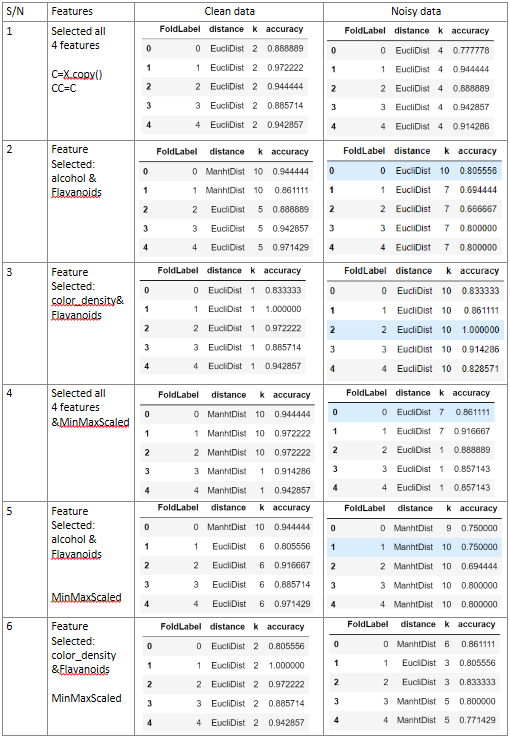

Modelling as shown below

In [32]:
# S/N 1 : clean data
C=X.copy()

testFoldAccuracy_C,  testFoldMetrics_C, valMetrics_C = myNestedCrossVal(C,y,5,[EucliDist,ManhtDist],
                                                                        list(range(1,11)))

testFoldAccuracy=pd.DataFrame(testFoldAccuracy_C.keys(),columns=['FoldLabel', 'distance','k'])

testFoldAccuracy['accuracy']=testFoldAccuracy_C.values()
testFoldAccuracy

new iterration
Validation Fold: 1 Distance Function: EucliDist k: 1 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: EucliDist k: 2 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 3 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 4 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 5 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 6 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: EucliDist k: 7 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: EucliDist k: 8 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: EucliDist k: 9 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: EucliDist k: 10 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: ManhtDist k: 1 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: ManhtDist k: 2 Accuracy: 0.9166666666666666


,FoldLabel,distance,k,accuracy
0,0,EucliDist,2,0.888889
1,1,EucliDist,2,0.972222
2,2,EucliDist,2,0.944444
3,3,EucliDist,2,0.885714
4,4,EucliDist,2,0.942857


In [33]:
# S/N 1 : noisy data
# To generate random noise and add to predictors
mySeed = 12345
np.random.seed(mySeed) 
NC=C+np.random.normal(0,0.5,C.shape)

testFoldAccuracy_NC, testFoldMetrics_NC, valMetrics_NC = myNestedCrossVal(NC,y,5,[EucliDist,ManhtDist],
                                                                           list(range(1,11)))

testFoldAccuracy_N=pd.DataFrame(testFoldAccuracy_NC.keys(),columns=['FoldLabel', 'distance','k'])

testFoldAccuracy_N['accuracy']=testFoldAccuracy_NC.values()
testFoldAccuracy_N

new iterration
Validation Fold: 1 Distance Function: EucliDist k: 1 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 2 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: EucliDist k: 3 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 4 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 5 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 6 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 7 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 8 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 9 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 10 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: ManhtDist k: 1 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: ManhtDist k: 2 Accuracy: 0.8888888888888888


,FoldLabel,distance,k,accuracy
0,0,EucliDist,4,0.777778
1,1,EucliDist,4,0.944444
2,2,EucliDist,4,0.888889
3,3,EucliDist,4,0.942857
4,4,EucliDist,4,0.914286


In [34]:
# S/N 2 : clean data
C=X.copy()[:,0:2]

testFoldAccuracy_C,  testFoldMetrics_C, valMetrics_C = myNestedCrossVal(C,y,5,[EucliDist,ManhtDist],
                                                                        list(range(1,11)))

testFoldAccuracy=pd.DataFrame(testFoldAccuracy_C.keys(),columns=['FoldLabel', 'distance','k'])

testFoldAccuracy['accuracy']=testFoldAccuracy_C.values()
testFoldAccuracy

new iterration
Validation Fold: 1 Distance Function: EucliDist k: 1 Accuracy: 0.7777777777777778
Validation Fold: 1 Distance Function: EucliDist k: 2 Accuracy: 0.7777777777777778
Validation Fold: 1 Distance Function: EucliDist k: 3 Accuracy: 0.8055555555555556
Validation Fold: 1 Distance Function: EucliDist k: 4 Accuracy: 0.8333333333333334
Validation Fold: 1 Distance Function: EucliDist k: 5 Accuracy: 0.8333333333333334
Validation Fold: 1 Distance Function: EucliDist k: 6 Accuracy: 0.8888888888888888
Validation Fold: 1 Distance Function: EucliDist k: 7 Accuracy: 0.8333333333333334
Validation Fold: 1 Distance Function: EucliDist k: 8 Accuracy: 0.8888888888888888
Validation Fold: 1 Distance Function: EucliDist k: 9 Accuracy: 0.8333333333333334
Validation Fold: 1 Distance Function: EucliDist k: 10 Accuracy: 0.8888888888888888
Validation Fold: 1 Distance Function: ManhtDist k: 1 Accuracy: 0.7777777777777778
Validation Fold: 1 Distance Function: ManhtDist k: 2 Accuracy: 0.8333333333333334


,FoldLabel,distance,k,accuracy
0,0,ManhtDist,10,0.944444
1,1,ManhtDist,10,0.861111
2,2,EucliDist,5,0.888889
3,3,EucliDist,5,0.942857
4,4,EucliDist,5,0.971429


In [35]:
# S/N 2 : noisy data
C=X.copy()[:,0:2]
# To generate random noise and add to predictors
mySeed = 12345
np.random.seed(mySeed) 
NC=C+np.random.normal(0,0.5,C.shape)

testFoldAccuracy_NC, testFoldMetrics_NC, valMetrics_NC = myNestedCrossVal(NC,y,5,[EucliDist,ManhtDist],
                                                                           list(range(1,11)))

testFoldAccuracy_N=pd.DataFrame(testFoldAccuracy_NC.keys(),columns=['FoldLabel', 'distance','k'])

testFoldAccuracy_N['accuracy']=testFoldAccuracy_NC.values()
testFoldAccuracy_N

new iterration
Validation Fold: 1 Distance Function: EucliDist k: 1 Accuracy: 0.6388888888888888
Validation Fold: 1 Distance Function: EucliDist k: 2 Accuracy: 0.6944444444444444
Validation Fold: 1 Distance Function: EucliDist k: 3 Accuracy: 0.6666666666666666
Validation Fold: 1 Distance Function: EucliDist k: 4 Accuracy: 0.6944444444444444
Validation Fold: 1 Distance Function: EucliDist k: 5 Accuracy: 0.7222222222222222
Validation Fold: 1 Distance Function: EucliDist k: 6 Accuracy: 0.7222222222222222
Validation Fold: 1 Distance Function: EucliDist k: 7 Accuracy: 0.6666666666666666
Validation Fold: 1 Distance Function: EucliDist k: 8 Accuracy: 0.7222222222222222
Validation Fold: 1 Distance Function: EucliDist k: 9 Accuracy: 0.7222222222222222
Validation Fold: 1 Distance Function: EucliDist k: 10 Accuracy: 0.75
Validation Fold: 1 Distance Function: ManhtDist k: 1 Accuracy: 0.6944444444444444
Validation Fold: 1 Distance Function: ManhtDist k: 2 Accuracy: 0.6666666666666666
Validation Fol

,FoldLabel,distance,k,accuracy
0,0,EucliDist,10,0.805556
1,1,EucliDist,7,0.694444
2,2,EucliDist,7,0.666667
3,3,EucliDist,7,0.800000
4,4,EucliDist,7,0.800000


In [36]:
# S/N 3 : clean data
C=X.copy()[:,1:3]

testFoldAccuracy_C,  testFoldMetrics_C, valMetrics_C = myNestedCrossVal(C,y,5,[EucliDist,ManhtDist],
                                                                        list(range(1,11)))

testFoldAccuracy=pd.DataFrame(testFoldAccuracy_C.keys(),columns=['FoldLabel', 'distance','k'])

testFoldAccuracy['accuracy']=testFoldAccuracy_C.values()
testFoldAccuracy

new iterration
Validation Fold: 1 Distance Function: EucliDist k: 1 Accuracy: 1.0
Validation Fold: 1 Distance Function: EucliDist k: 2 Accuracy: 1.0
Validation Fold: 1 Distance Function: EucliDist k: 3 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 4 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 5 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 6 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 7 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 8 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 9 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 10 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: ManhtDist k: 1 Accuracy: 1.0
Validation Fold: 1 Distance Function: ManhtDist k: 2 Accuracy: 1.0
Validation Fold: 1 Distance Function: ManhtDist k: 3 Accurac

,FoldLabel,distance,k,accuracy
0,0,EucliDist,1,0.833333
1,1,EucliDist,1,1.000000
2,2,EucliDist,1,0.972222
3,3,EucliDist,1,0.885714
4,4,EucliDist,1,0.942857


In [37]:
# S/N 1 : noisy data
# To generate random noise and add to predictors
mySeed = 12345
np.random.seed(mySeed) 
NC=C+np.random.normal(0,0.5,C.shape)

testFoldAccuracy_NC, testFoldMetrics_NC, valMetrics_NC = myNestedCrossVal(NC,y,5,[EucliDist,ManhtDist],
                                                                           list(range(1,11)))

testFoldAccuracy_N=pd.DataFrame(testFoldAccuracy_NC.keys(),columns=['FoldLabel', 'distance','k'])

testFoldAccuracy_N['accuracy']=testFoldAccuracy_NC.values()
testFoldAccuracy_N

new iterration
Validation Fold: 1 Distance Function: EucliDist k: 1 Accuracy: 0.8055555555555556
Validation Fold: 1 Distance Function: EucliDist k: 2 Accuracy: 0.8055555555555556
Validation Fold: 1 Distance Function: EucliDist k: 3 Accuracy: 0.8611111111111112
Validation Fold: 1 Distance Function: EucliDist k: 4 Accuracy: 0.8611111111111112
Validation Fold: 1 Distance Function: EucliDist k: 5 Accuracy: 0.8611111111111112
Validation Fold: 1 Distance Function: EucliDist k: 6 Accuracy: 0.8611111111111112
Validation Fold: 1 Distance Function: EucliDist k: 7 Accuracy: 0.8333333333333334
Validation Fold: 1 Distance Function: EucliDist k: 8 Accuracy: 0.8611111111111112
Validation Fold: 1 Distance Function: EucliDist k: 9 Accuracy: 0.8611111111111112
Validation Fold: 1 Distance Function: EucliDist k: 10 Accuracy: 0.8888888888888888
Validation Fold: 1 Distance Function: ManhtDist k: 1 Accuracy: 0.8611111111111112
Validation Fold: 1 Distance Function: ManhtDist k: 2 Accuracy: 0.8055555555555556


,FoldLabel,distance,k,accuracy
0,0,EucliDist,10,0.833333
1,1,EucliDist,10,0.861111
2,2,EucliDist,10,1.000000
3,3,EucliDist,10,0.914286
4,4,EucliDist,10,0.828571


In [38]:
# S/N 4: clean data
C=X.copy()

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
C_scaled=scaler.fit_transform(C)

testFoldAccuracy_C_scaled,  testFoldMetrics_C_scaled, valMetrics_C_scaled = myNestedCrossVal(C_scaled,y,5,
                                                                                             [EucliDist,ManhtDist],
                                                                                             list(range(1,11)))

testFoldAccuracy=pd.DataFrame(testFoldAccuracy_C_scaled.keys(),columns=['FoldLabel', 'distance','k'])

testFoldAccuracy['accuracy']=testFoldAccuracy_C_scaled.values()
testFoldAccuracy

new iterration
Validation Fold: 1 Distance Function: EucliDist k: 1 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: EucliDist k: 2 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 3 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 4 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: EucliDist k: 5 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: EucliDist k: 6 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 7 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 8 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: EucliDist k: 9 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 10 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: ManhtDist k: 1 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: ManhtDist k: 2 Accuracy: 0.9444444444444444


,FoldLabel,distance,k,accuracy
0,0,ManhtDist,10,0.944444
1,1,ManhtDist,10,0.972222
2,2,ManhtDist,10,0.972222
3,3,ManhtDist,1,0.914286
4,4,ManhtDist,1,0.942857


In [39]:
# S/N 4 : noisy data
# To generate random noise and add to predictors
mySeed = 12345
np.random.seed(mySeed) 
# re-select noise scale as 0.1 
NC_scaled=C_scaled+np.random.normal(0, 0.1,C_scaled.shape)

testFoldAccuracy_NC_scaled, testFoldMetrics_NC_scaled, valMetrics_NC_scaled = myNestedCrossVal(NC_scaled,y,5,
                                                                                               [EucliDist,ManhtDist],
                                                                                               list(range(1,11)))

testFoldAccuracy_N_scaled=pd.DataFrame(testFoldAccuracy_NC_scaled.keys(),columns=['FoldLabel', 'distance','k'])

testFoldAccuracy_N_scaled['accuracy']=testFoldAccuracy_NC_scaled.values()
testFoldAccuracy_N_scaled

new iterration
Validation Fold: 1 Distance Function: EucliDist k: 1 Accuracy: 0.8333333333333334
Validation Fold: 1 Distance Function: EucliDist k: 2 Accuracy: 0.8055555555555556
Validation Fold: 1 Distance Function: EucliDist k: 3 Accuracy: 0.8888888888888888
Validation Fold: 1 Distance Function: EucliDist k: 4 Accuracy: 0.8055555555555556
Validation Fold: 1 Distance Function: EucliDist k: 5 Accuracy: 0.8888888888888888
Validation Fold: 1 Distance Function: EucliDist k: 6 Accuracy: 0.8055555555555556
Validation Fold: 1 Distance Function: EucliDist k: 7 Accuracy: 0.9166666666666666
Validation Fold: 1 Distance Function: EucliDist k: 8 Accuracy: 0.8611111111111112
Validation Fold: 1 Distance Function: EucliDist k: 9 Accuracy: 0.8888888888888888
Validation Fold: 1 Distance Function: EucliDist k: 10 Accuracy: 0.8611111111111112
Validation Fold: 1 Distance Function: ManhtDist k: 1 Accuracy: 0.8055555555555556
Validation Fold: 1 Distance Function: ManhtDist k: 2 Accuracy: 0.8055555555555556


,FoldLabel,distance,k,accuracy
0,0,EucliDist,7,0.861111
1,1,EucliDist,7,0.916667
2,2,EucliDist,1,0.888889
3,3,EucliDist,1,0.857143
4,4,EucliDist,1,0.857143


In [40]:
# S/N 5: clean data
C=X.copy()[:,0:2]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
C_scaled=scaler.fit_transform(C)

testFoldAccuracy_C_scaled,  testFoldMetrics_C_scaled, valMetrics_C_scaled = myNestedCrossVal(C_scaled,y,5,
                                                                                             [EucliDist,ManhtDist],
                                                                                             list(range(1,11)))

testFoldAccuracy=pd.DataFrame(testFoldAccuracy_C_scaled.keys(),columns=['FoldLabel', 'distance','k'])

testFoldAccuracy['accuracy']=testFoldAccuracy_C_scaled.values()
testFoldAccuracy


new iterration
Validation Fold: 1 Distance Function: EucliDist k: 1 Accuracy: 0.7777777777777778
Validation Fold: 1 Distance Function: EucliDist k: 2 Accuracy: 0.7777777777777778
Validation Fold: 1 Distance Function: EucliDist k: 3 Accuracy: 0.8055555555555556
Validation Fold: 1 Distance Function: EucliDist k: 4 Accuracy: 0.8333333333333334
Validation Fold: 1 Distance Function: EucliDist k: 5 Accuracy: 0.8333333333333334
Validation Fold: 1 Distance Function: EucliDist k: 6 Accuracy: 0.8611111111111112
Validation Fold: 1 Distance Function: EucliDist k: 7 Accuracy: 0.8611111111111112
Validation Fold: 1 Distance Function: EucliDist k: 8 Accuracy: 0.8611111111111112
Validation Fold: 1 Distance Function: EucliDist k: 9 Accuracy: 0.8333333333333334
Validation Fold: 1 Distance Function: EucliDist k: 10 Accuracy: 0.8611111111111112
Validation Fold: 1 Distance Function: ManhtDist k: 1 Accuracy: 0.7777777777777778
Validation Fold: 1 Distance Function: ManhtDist k: 2 Accuracy: 0.8333333333333334


,FoldLabel,distance,k,accuracy
0,0,ManhtDist,10,0.944444
1,1,EucliDist,6,0.805556
2,2,EucliDist,6,0.916667
3,3,EucliDist,6,0.885714
4,4,EucliDist,6,0.971429


In [41]:
# S/N 5 : noisy data
# To generate random noise and add to predictors
mySeed = 12345
np.random.seed(mySeed) 
# re-select noise scale as 0.1 
NC_scaled=C_scaled+np.random.normal(0, 0.1,C_scaled.shape)

testFoldAccuracy_NC_scaled, testFoldMetrics_NC_scaled, valMetrics_NC_scaled = myNestedCrossVal(NC_scaled,y,5,
                                                                                               [EucliDist,ManhtDist],
                                                                                               list(range(1,11)))

testFoldAccuracy_N_scaled=pd.DataFrame(testFoldAccuracy_NC_scaled.keys(),columns=['FoldLabel', 'distance','k'])

testFoldAccuracy_N_scaled['accuracy']=testFoldAccuracy_NC_scaled.values()
testFoldAccuracy_N_scaled

new iterration
Validation Fold: 1 Distance Function: EucliDist k: 1 Accuracy: 0.6666666666666666
Validation Fold: 1 Distance Function: EucliDist k: 2 Accuracy: 0.7222222222222222
Validation Fold: 1 Distance Function: EucliDist k: 3 Accuracy: 0.75
Validation Fold: 1 Distance Function: EucliDist k: 4 Accuracy: 0.7222222222222222
Validation Fold: 1 Distance Function: EucliDist k: 5 Accuracy: 0.75
Validation Fold: 1 Distance Function: EucliDist k: 6 Accuracy: 0.6944444444444444
Validation Fold: 1 Distance Function: EucliDist k: 7 Accuracy: 0.7222222222222222
Validation Fold: 1 Distance Function: EucliDist k: 8 Accuracy: 0.75
Validation Fold: 1 Distance Function: EucliDist k: 9 Accuracy: 0.75
Validation Fold: 1 Distance Function: EucliDist k: 10 Accuracy: 0.75
Validation Fold: 1 Distance Function: ManhtDist k: 1 Accuracy: 0.6944444444444444
Validation Fold: 1 Distance Function: ManhtDist k: 2 Accuracy: 0.7222222222222222
Validation Fold: 1 Distance Function: ManhtDist k: 3 Accuracy: 0.75
Va

,FoldLabel,distance,k,accuracy
0,0,ManhtDist,9,0.750000
1,1,ManhtDist,10,0.750000
2,2,ManhtDist,10,0.694444
3,3,ManhtDist,10,0.800000
4,4,ManhtDist,10,0.800000


In [42]:
# S/N 6: clean data
C=X.copy()[:,1:3]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
C_scaled=scaler.fit_transform(C)

testFoldAccuracy_C_scaled,  testFoldMetrics_C_scaled, valMetrics_C_scaled = myNestedCrossVal(C_scaled,y,5,
                                                                                             [EucliDist,ManhtDist],
                                                                                             list(range(1,11)))

testFoldAccuracy=pd.DataFrame(testFoldAccuracy_C_scaled.keys(),columns=['FoldLabel', 'distance','k'])

testFoldAccuracy['accuracy']=testFoldAccuracy_C_scaled.values()
testFoldAccuracy

new iterration
Validation Fold: 1 Distance Function: EucliDist k: 1 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: EucliDist k: 2 Accuracy: 1.0
Validation Fold: 1 Distance Function: EucliDist k: 3 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 4 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 5 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 6 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 7 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 8 Accuracy: 1.0
Validation Fold: 1 Distance Function: EucliDist k: 9 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: EucliDist k: 10 Accuracy: 0.9722222222222222
Validation Fold: 1 Distance Function: ManhtDist k: 1 Accuracy: 0.9444444444444444
Validation Fold: 1 Distance Function: ManhtDist k: 2 Accuracy: 1.0
Validation Fold: 1 Distance Function: ManhtDi

,FoldLabel,distance,k,accuracy
0,0,EucliDist,2,0.805556
1,1,EucliDist,2,1.000000
2,2,EucliDist,2,0.972222
3,3,EucliDist,2,0.885714
4,4,EucliDist,2,0.942857


In [43]:
# S/N 6 : noisy data
# To generate random noise and add to predictors
mySeed = 12345
np.random.seed(mySeed) 
# re-select noise scale as 0.1 
NC_scaled=C_scaled+np.random.normal(0, 0.1,C_scaled.shape)

testFoldAccuracy_NC_scaled, testFoldMetrics_NC_scaled, valMetrics_NC_scaled = myNestedCrossVal(NC_scaled,y,5,
                                                                                               [EucliDist,ManhtDist],
                                                                                               list(range(1,11)))

testFoldAccuracy_N_scaled=pd.DataFrame(testFoldAccuracy_NC_scaled.keys(),columns=['FoldLabel', 'distance','k'])

testFoldAccuracy_N_scaled['accuracy']=testFoldAccuracy_NC_scaled.values()
testFoldAccuracy_N_scaled

new iterration
Validation Fold: 1 Distance Function: EucliDist k: 1 Accuracy: 0.6388888888888888
Validation Fold: 1 Distance Function: EucliDist k: 2 Accuracy: 0.6666666666666666
Validation Fold: 1 Distance Function: EucliDist k: 3 Accuracy: 0.7777777777777778
Validation Fold: 1 Distance Function: EucliDist k: 4 Accuracy: 0.7777777777777778
Validation Fold: 1 Distance Function: EucliDist k: 5 Accuracy: 0.75
Validation Fold: 1 Distance Function: EucliDist k: 6 Accuracy: 0.7222222222222222
Validation Fold: 1 Distance Function: EucliDist k: 7 Accuracy: 0.7777777777777778
Validation Fold: 1 Distance Function: EucliDist k: 8 Accuracy: 0.7777777777777778
Validation Fold: 1 Distance Function: EucliDist k: 9 Accuracy: 0.7222222222222222
Validation Fold: 1 Distance Function: EucliDist k: 10 Accuracy: 0.7777777777777778
Validation Fold: 1 Distance Function: ManhtDist k: 1 Accuracy: 0.6388888888888888
Validation Fold: 1 Distance Function: ManhtDist k: 2 Accuracy: 0.6666666666666666
Validation Fol

,FoldLabel,distance,k,accuracy
0,0,ManhtDist,6,0.861111
1,1,EucliDist,3,0.805556
2,2,EucliDist,3,0.833333
3,3,ManhtDist,5,0.800000
4,4,ManhtDist,5,0.771429


### What happens if you have selected k=2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? 

Tie break: The purpose of this tie break is to classify an unknown data point by its nearest neighbors, hence tie will be broke by dropping the furtherest data point. 

for data point i,

    for [(k_labels), (k_distances)] from the nearest k_neighbors:
    
        label, count = numpy.unique((k_labels), return_counts=True)
        
        sorted_count = sort count in descending order
    
        if sorted_count[0] == sorted_count[1]
    
            drop the neighbor with max(k_distances), set inplace=True
        
        else:
    
            label of i = label of max(count)
        

### Beyond Wine: what to consider to apply kNN on different datasets?

The above kNN algorithm is not a 'one size fits all' solution to different datasets. As discussed previously, several factors need to be evaluated when apply kNN algorithm.

1. Stratified sampling may be used to better represent population in train-test splitting or cross validation splitting. Especially the data is imbalanced. As simple random sampling may split data into subgroups which draw different poportions from different classes. 

2. Evaluate which features to select. If less features could do the same level of classification job, features with little impact could be dropped.

3. Scaling could be necessary if the scales of features vary a lot, the larger scaled feature could be more influential in distance calculation. In previous modelling, although color_intensity scaled around three times large than other features, it could seperate wine class 1 better than others. Hence, modelling based on the original scale unlikely to harm the performance.

4. Evaluate the noise level. If noise level is too small, it would have minimum influence on data. If noise level too high, noises would spread out empty spaces among data points making classification difficult or even impossible.

5. The number of neighbors(k) matters and need careful evaluation. If k is too low, the model may form very complex decision boundaries and fail to generalise on test data set. If k is too high, the model may form overly simplified boundries or even not able to form boundries to classify different groups. Therefore, the performance prone to drop.

6. The metrics used for classifying need careful evaluation. Clients may have different requirements thus resulting in different metrics used in classifying. Instead of accuracy score used in our model, specific client may require recall score for some specific classes.

7. The distance measure need careful evaluation. Manhattan distance calculate L1-norm distance while Euclidean distance calculate L2-norm distance. Other distance measure may be used, such as Cosine similarity. We will need to justify difference distance measures based on the type of data encountered.